Importing libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV
from sklearn.utils.class_weight import compute_class_weight
import pickle
import folium

Saving the sheets into a single file

In [4]:
all_sheets = pd.read_excel("working.xlsx", sheet_name=None)

# Concatenate all sheets into a single DataFrame
merged_data = pd.concat(all_sheets.values(), ignore_index=True)

# Saved to a new file

merged_data.to_excel("Merged_Data.xlsx", index=False)


Reading the data

In [5]:
data = pd.read_excel("Merged_Data.xlsx")

Summary of the data

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20066 entries, 0 to 20065
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   District            20066 non-null  object        
 1   PS Name             20066 non-null  object        
 2   FIR No              15572 non-null  object        
 3   Date Report         20066 non-null  datetime64[ns]
 4   Date Accident       20066 non-null  datetime64[ns]
 5   Time Report         20066 non-null  object        
 6   Time Accident       20066 non-null  object        
 7   Sections            20066 non-null  object        
 8   Accident type       20066 non-null  object        
 9   Death               20066 non-null  int64         
 10  Grievous            20066 non-null  int64         
 11  Minor               20066 non-null  int64         
 12  Pedestrian          20066 non-null  int64         
 13  Cyclist             20066 non-null  int64     

In [7]:
data.head()

,District,PS Name,FIR No,Date Report,Date Accident,Time Report,Time Accident,Sections,Accident type,Death,...,Weather,T -Junction,Collision,Type Road,Road Features,Visibility,Traffic Control,Accussed Vehicle,Victim Vehicle,FIR
0,THIRUVANANTHAPURAM CITY,Vattiyoorkavu,7000/2019,2019-01-13,2019-12-01,18:00:00,17:30:00,"279,337,338",Minor Injury,0,...,Sunny/Clear,T- Junction,Hit from Back,National Highway,Straight Road,Good,Uncontrolled,Tipper,Motor Cycle,NaN
1,THIRUVANANTHAPURAM CITY,Vanchiyoor,7001/2019,2019-01-04,2019-12-31,11:25:00,06:30:00,279,Fatal,1,...,Sunny/Clear,Staggered junction,Hit Pedestrian,National Highway,Straight Road,Good,Uncontrolled,Motor Cycle,Motor Cycle,NaN
2,THIRUVANANTHAPURAM CITY,Vanchiyoor,7002/2019,2019-01-02,2019-12-24,17:40:00,08:45:00,MO(Minor),Grevious Injury,0,...,Sunny/Clear,NaN,Hit from Back,State Highway,Straight Road,Good,Uncontrolled,Motor Cycle,Scooter,NaN
3,THIRUVANANTHAPURAM CITY,Vanchiyoor,7003/2019,2019-01-02,2019-01-01,16:13:00,14:15:00,"279,337,338",Grevious Injury,0,...,Sunny/Clear,T- Junction,Hit from Back,Other Road,Curved Road,Good,Uncontrolled,Auto rickshaw,Motor Cycle,NaN
4,THIRUVANANTHAPURAM CITY,Vanchiyoor,7004/2019,2019-01-08,2019-01-17,18:15:00,17:45:00,"279,337,338",Grevious Injury,0,...,Sunny/Clear,NaN,Hit from Side,State Highway,Straight Road,Good,Uncontrolled,Motor Cycle,Car,NaN


In [8]:
data.shape

(20066, 32)

In [9]:
data.isnull().sum()

District                  0
PS Name                   0
FIR No                 4494
Date Report               0
Date Accident             0
Time Report               0
Time Accident             0
Sections                  0
Accident type             0
Death                     0
Grievous                  0
Minor                     0
Pedestrian                0
Cyclist                   0
Latitude                  0
Longitude                 0
Place of Occurance        0
Type Area                 0
City/Town/ Village        0
Lanes Road                0
Divider                   0
Spot Accident             0
Weather                   0
T -Junction           14596
Collision                 0
Type Road                 0
Road Features             0
Visibility                0
Traffic Control           0
Accussed Vehicle          0
Victim Vehicle            0
FIR                   15572
dtype: int64

Filling the missing values with placeholder unknown


In [10]:
data['T -Junction'] = data['T -Junction'].fillna("Unknown")

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20066 entries, 0 to 20065
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   District            20066 non-null  object        
 1   PS Name             20066 non-null  object        
 2   FIR No              15572 non-null  object        
 3   Date Report         20066 non-null  datetime64[ns]
 4   Date Accident       20066 non-null  datetime64[ns]
 5   Time Report         20066 non-null  object        
 6   Time Accident       20066 non-null  object        
 7   Sections            20066 non-null  object        
 8   Accident type       20066 non-null  object        
 9   Death               20066 non-null  int64         
 10  Grievous            20066 non-null  int64         
 11  Minor               20066 non-null  int64         
 12  Pedestrian          20066 non-null  int64         
 13  Cyclist             20066 non-null  int64     

Detecting Outliers

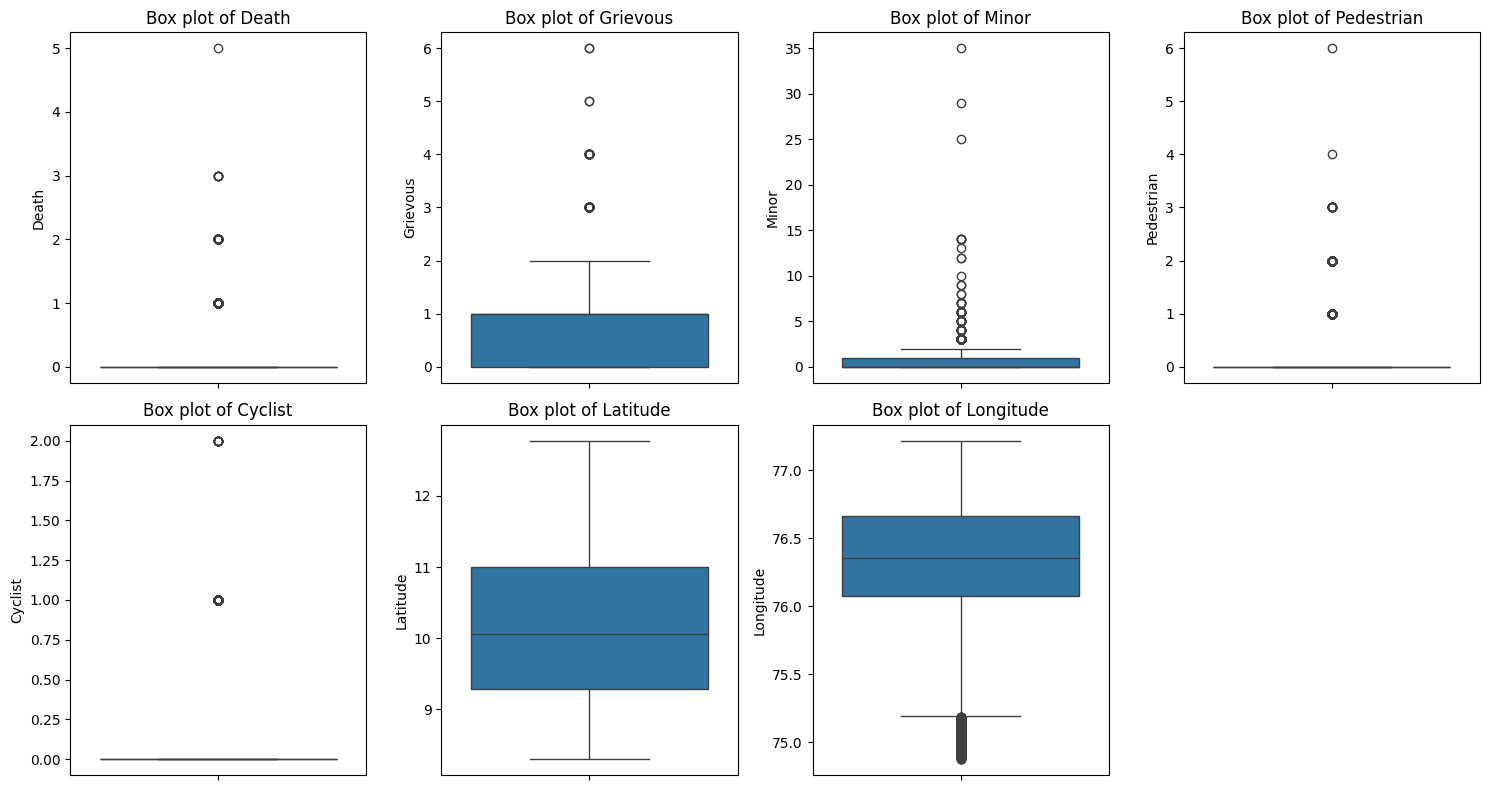

In [12]:
# Plot box plots for numerical columns
numerical_columns = ['Death', 'Grievous', 'Minor', 'Pedestrian', 'Cyclist', 'Latitude', 'Longitude']
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(data[col])
    plt.title(f"Box plot of {col}")

plt.tight_layout()
plt.show()


##### On analysing the values of the detected outlier column, it is concluded that they are not real outliers

In [13]:
for col in numerical_columns:
    print(data[col].unique())

[0 1 2 3 5]
[0 1 2 3 4 5 6]
[ 2  0  1  3  4  6  7  5 14 13 12 10  8  9 29 35 25]
[0 1 2 3 4 6]
[0 1 2]
[10.1902   10.107051  9.942077 ... 12.506886 11.986299 12.204597]
[76.2002   76.261841 76.644036 ... 75.040711 75.376123 75.134203]


In [14]:
data['Weather'].unique()

array(['Sunny/Clear', 'Mist/Fog', 'Very Hot', 'Cloudy', 'Snow',
       'Light rain', 'Heavy rain', 'Dust Storm', 'Hail/Sleet',
       'Very Cold'], dtype=object)

In [15]:
data['Type Road'].unique()

array(['National Highway', 'State Highway', 'Other Road', 'ODR', 'Bypass',
       'MDR'], dtype=object)

In [16]:
data['Road Features'].unique()

array(['Straight Road', 'Curved Road', 'Others',
       'Ongoing Road Works/Under Construction', 'Bridge', 'Steep Grade',
       'Culvert', 'Pot Holes'], dtype=object)

In [17]:
data['Visibility'].unique()

array(['Good', 'Poor', 'Not Known'], dtype=object)

In [18]:
data['Victim Vehicle'].unique()

array(['Motor Cycle', 'Scooter', 'Car', 'Goods Auto', 'Auto rickshaw',
       'Mini Lorry', 'Tipper', 'Lorry', 'Jeep', 'Mini Buses', 'Auto Taxi',
       'Tempo Van', 'Private Bus', ' Ambulance Private', 'Trolley',
       'School Bus', 'Torus', 'KSRTC Bus',
       'Appe (Goods Auto with Stearing)', 'Others',
       'Other Medium Goods vehicle', 'JCB', 'Govt. Dept. Bus', 'Truck',
       'Other Heavy vehicle', 'Vehicle not known', 'Tri Scooter',
       'Container', 'Police Jeep', 'Heavy articulated vehicle', 'Trailer',
       'College Bus', 'Tractor', 'Hitachi', 'Road Roller', 'Water Tanker',
       'Fuel Tanker'], dtype=object)

EDA

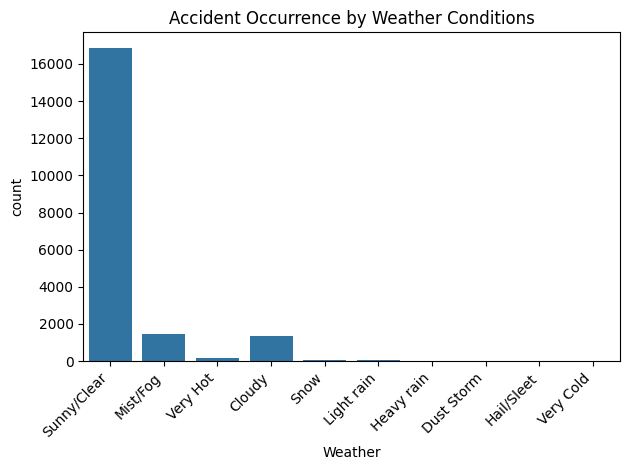

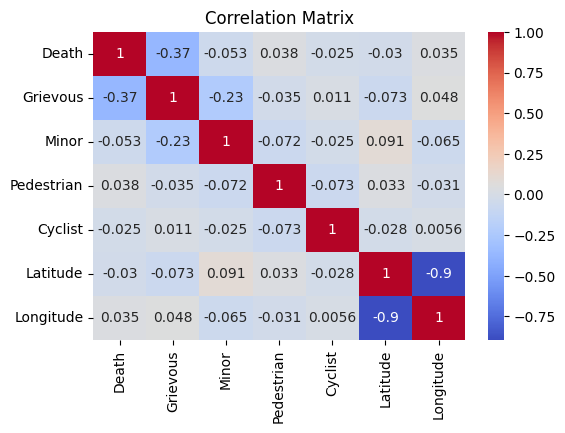

In [19]:
#Accident distribution by weather conditions

sns.countplot(x='Weather',  data=data)
plt.title("Accident Occurrence by Weather Conditions")
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()  # Adjust layout to ensure everything fits well
plt.show()

# Plotting correlation heatmap
numeric_data = data.select_dtypes(include=['number'])

# Compute and plot the correlation heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


## Feature Engineering


new feature, accident severity has been created

In [20]:
data['Accident_Severity'] = data['Death'] + data['Grievous'] + data['Minor']

In [21]:
data['Month'] = data['Date Accident'].dt.month
data['Day_of_Week'] = data['Date Accident'].dt.dayofweek

To predict whether an accident occurs under certain weather conditions, a binary target varaiable is created
where:

1 means an accident occurred.
0 means no accident.

In [22]:
# Define the binary target variable
data['Accident_Occurred'] = ((data['Death'] > 0) |(data['Grievous'] > 0) | (data['Minor'] > 0)).astype(int)


Creating a new dataframe for our prediction

In [23]:
# Select features and target variable
features = ['Weather', 'Type Area', 'Visibility', 'Type Road', 'Road Features','Month', 'Day_of_Week']
X = data[features]  # Features DataFrame
y = data['Accident_Occurred']  # Target variable

#### Encoding

In [24]:
# One-hot encode categorical features
X = pd.get_dummies(X, drop_first=True)

In [25]:
with open("columns.pkl", "wb") as file:
    pickle.dump(X.columns.tolist(), file)

Data Splitting

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Model Selection and Implementation

Initialise models

In [27]:
rf_model = RandomForestClassifier(random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)
log_reg_model = LogisticRegression(random_state=42, max_iter=1000)


Creating voting model

In [28]:
voting_model = VotingClassifier(estimators=[
    ('rf', rf_model),
    ('gb', gb_model),
    ('lr', log_reg_model)
], voting='soft')

# Train the Voting Classifier
voting_model.fit(X_train, y_train)

VotingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                             ('gb',
                              GradientBoostingClassifier(random_state=42)),
                             ('lr',
                              LogisticRegression(max_iter=1000,
                                                 random_state=42))],
                 voting='soft')

Model Prediction

In [29]:
y_pred = voting_model.predict(X_test)
y_prob = voting_model.predict_proba(X_test)[:, 1]

Model Evaluation

In [30]:
print(f"\nVoting Classifier Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"Precision: {precision_score(y_test, y_pred):.2f}")
print(f"Recall: {recall_score(y_test, y_pred):.2f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.2f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_prob):.2f}")

# Save the trained model
with open("voting_model.pkl", "wb") as file:
    pickle.dump(voting_model, file)


Voting Classifier Evaluation:
Accuracy: 0.97
Precision: 0.97
Recall: 1.00
F1-Score: 0.99
ROC-AUC: 0.65


Sample inputs

In [31]:
import pandas as pd
import pickle

# Load the trained model and column names
with open("voting_model.pkl", "rb") as file:
    voting_model = pickle.load(file)

with open("columns.pkl", "rb") as file:
    trained_columns = pickle.load(file)

# Example input data for prediction
sample_data = {
    'Weather': ['Sunny/Clear'],
    'Type Area': ['Urban'],
    'Visibility': ['Good'],
    'Type Road': ['National Highway'],
    'Road Features': ['Straight Road'],
    'Month': [1],  # January
    'Day_of_Week': [2]  # Monday
}

# Convert input data to DataFrame
sample_df = pd.DataFrame(sample_data)

# One-hot encode the input data
sample_encoded = pd.get_dummies(sample_df, drop_first=True)

# Align columns with the trained model
sample_encoded = sample_encoded.reindex(columns=trained_columns, fill_value=0)

# Make predictions
y_pred_sample = voting_model.predict(sample_encoded)
y_prob_sample = voting_model.predict_proba(sample_encoded)[:, 1]

print(f"Predicted Accident Occurrence: {y_pred_sample[0]}")
print(f"Predicted Probability of Accident Occurrence: {y_prob_sample[0]:.2f}")


Predicted Accident Occurrence: 1
Predicted Probability of Accident Occurrence: 0.97


In [32]:
class_weights = compute_class_weight('balanced', classes=np.array([0, 1]), y=y_train)

# Convert the result into a dictionary for convenience
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}

# Now you can use this in your model
model = RandomForestClassifier(random_state=42, class_weight=class_weight_dict)
model.fit(X_train, y_train)


# Make predictions and evaluate the model
y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)[:, 1]


NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

Handle class imbalance by calculating class weights

In [ ]:
# Convert the classes to numpy array
class_weights = compute_class_weight('balanced', classes=np.array([0, 1]), y=y_train)

# Convert the result into a dictionary for convenience
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}

# Now you can use this in your model
model = RandomForestClassifier(random_state=42, class_weight=class_weight_dict)
model.fit(X_train, y_train)


# Make predictions and evaluate the model
y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)[:, 1]

# Evaluate the Random Forest model
print(f"Random Forest Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"Precision: {precision_score(y_test, y_pred):.2f}")
print(f"Recall: {recall_score(y_test, y_pred):.2f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.2f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_prob):.2f}")


Random Forest Model Evaluation:
Accuracy: 0.97
Precision: 0.97
Recall: 1.00
F1-Score: 0.99
ROC-AUC: 0.59


Evaluate using cross-validation

In [ ]:

cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}")

Cross-Validation Accuracy: 0.97 ± 0.00


Sample input

In [ ]:
# Create a sample input with values corresponding to the unique categories
sample_data = {
    'Weather': ['Sunny/Clear'],
    'Type Area': ['Urban'],
    'Visibility': ['Good'],
    'Type Road': ['National Highway'],
    'Road Features': ['Straight Road'],
    'Month': [1],  # Example: January
    'Day_of_Week': [2]  # Example: Monday
}

# Convert to DataFrame
sample_df = pd.DataFrame(sample_data)

# One-hot encode the sample data
sample_encoded = pd.get_dummies(sample_df, drop_first=True)

# Ensure the columns in the sample match the training set (i.e., same features and order)
sample_encoded = sample_encoded.reindex(columns=X_train.columns, fill_value=0)

# Now, make predictions using the trained model (RandomForest in this case)
y_pred_sample = rf_model.predict(sample_encoded)  # Replace rf_model with your trained model
y_prob_sample = rf_model.predict_proba(sample_encoded)[:, 1]  # Get probability for class '1' (accident occurred)

# Print the predictions and probabilities
print(f"Predicted Accident Occurrence: {y_pred_sample[0]}")
print(f"Predicted Probability of Accident Occurrence: {y_prob_sample[0]:.2f}")


Predicted Accident Occurrence: 1
Predicted Probability of Accident Occurrence: 0.97


Feature Importances

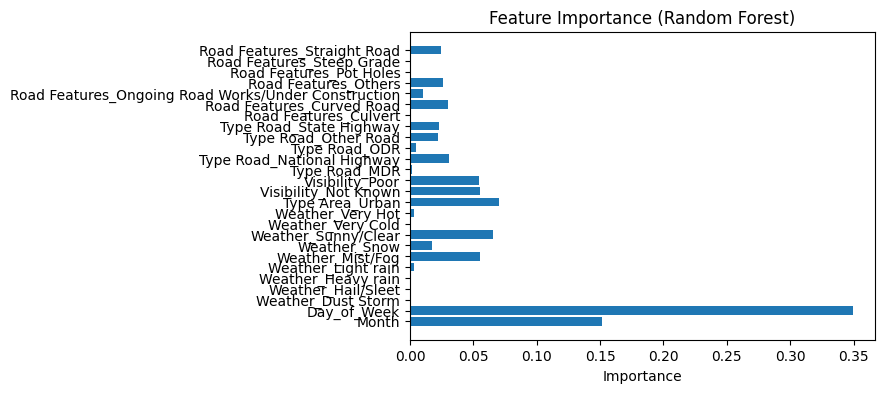

In [ ]:

importances = rf_model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(6, 4))
plt.barh(feature_names, importances)
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance')
plt.show()

Gradient Boosting Model

In [ ]:

gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions 
y_pred_gb = gb_model.predict(X_test)
y_prob_gb = gb_model.predict_proba(X_test)[:, 1]
#and evaluate Gradient Boosting
print(f"\nGradient Boosting Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_gb):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_gb):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_gb):.2f}")
print(f"F1-Score: {f1_score(y_test, y_pred_gb):.2f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_prob_gb):.2f}")


Gradient Boosting Model Evaluation:
Accuracy: 0.97
Precision: 0.97
Recall: 1.00
F1-Score: 0.99
ROC-AUC: 0.64


Sample input


In [ ]:
# Create a sample input with values corresponding to the unique categories
sample_data = {
    'Weather': ['Sunny/Clear'],
    'Type Area': ['Urban'],
    'Visibility': ['Good'],
    'Type Road': ['National Highway'],
    'Road Features': ['Straight Road'],
    'Month': [1],  # Example: January
    'Day_of_Week': [2]  # Example: Monday
}

# Convert to DataFrame
sample_df = pd.DataFrame(sample_data)

# One-hot encode the sample data
sample_encoded = pd.get_dummies(sample_df, drop_first=True)

# Ensure the columns in the sample match the training set (i.e., same features and order)
sample_encoded = sample_encoded.reindex(columns=X_train.columns, fill_value=0)

# Now, make predictions using the trained model (RandomForest in this case)
y_pred_sample = gb_model.predict(sample_encoded)  # Replace rf_model with your trained model
y_prob_sample = gb_model.predict_proba(sample_encoded)[:, 1]  # Get probability for class '1' (accident occurred)

# Print the predictions and probabilities
print(f"Predicted Accident Occurrence: {y_pred_sample[0]}")
print(f"Predicted Probability of Accident Occurrence: {y_prob_sample[0]:.2f}")


Predicted Accident Occurrence: 1
Predicted Probability of Accident Occurrence: 0.96


Logistic Regression Model

In [ ]:

log_reg_model = LogisticRegression(random_state=42, max_iter=1000)
log_reg_model.fit(X_train, y_train)

# Predict 
y_pred_lr = log_reg_model.predict(X_test)
y_prob_lr = log_reg_model.predict_proba(X_test)[:, 1]

#evaluate 
print(f"\nLogistic Regression Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_lr):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_lr):.2f}")
print(f"F1-Score: {f1_score(y_test, y_pred_lr):.2f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_prob_lr):.2f}")


Logistic Regression Model Evaluation:
Accuracy: 0.97
Precision: 0.97
Recall: 1.00
F1-Score: 0.99
ROC-AUC: 0.62


Sample input

In [ ]:
# Create a sample input with values corresponding to the unique categories
sample_data = {
    'Weather': ['Sunny/Clear'],
    'Type Area': ['Urban'],
    'Visibility': ['Good'],
    'Type Road': ['National Highway'],
    'Road Features': ['Straight Road'],
    'Month': [1],  # Example: January
    'Day_of_Week': [2]  # Example: Monday
}

# Convert to DataFrame
sample_df = pd.DataFrame(sample_data)

# One-hot encode the sample data
sample_encoded = pd.get_dummies(sample_df, drop_first=True)

# Ensure the columns in the sample match the training set (i.e., same features and order)
sample_encoded = sample_encoded.reindex(columns=X_train.columns, fill_value=0)

# Now, make predictions using the trained model (RandomForest in this case)
y_pred_sample = log_reg_model.predict(sample_encoded)  # Replace rf_model with your trained model
y_prob_sample = log_reg_model.predict_proba(sample_encoded)[:, 1]  # Get probability for class '1' (accident occurred)

# Print the predictions and probabilities
print(f"Predicted Accident Occurrence: {y_pred_sample[0]}")
print(f"Predicted Probability of Accident Occurrence: {y_prob_sample[0]:.2f}")


Predicted Accident Occurrence: 1
Predicted Probability of Accident Occurrence: 0.98


Combine all models using a Voting Classifier

In [ ]:
voting_model = VotingClassifier(estimators=[
    ('rf', rf_model),
    ('gb', gb_model),
    ('lr', log_reg_model)
], voting='soft')

# Train the Voting Classifier
voting_model.fit(X_train, y_train)

# Evaluate the Voting Classifier
y_pred_voting = voting_model.predict(X_test)
y_prob_voting = voting_model.predict_proba(X_test)[:, 1]

print(f"\nVoting Classifier Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_voting):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_voting):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_voting):.2f}")
print(f"F1-Score: {f1_score(y_test, y_pred_voting):.2f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_prob_voting):.2f}")


Voting Classifier Evaluation:
Accuracy: 0.97
Precision: 0.97
Recall: 1.00
F1-Score: 0.99
ROC-AUC: 0.65


pkl file for voting model


In [ ]:
with open("voting_model.pkl", "wb") as file:
    pickle.dump(voting_model, file)
print("Model saved as voting_model.pkl")


Model saved as voting_model.pkl


Sample input

In [ ]:
# Create a sample input with values corresponding to the unique categories
sample_data = {
    'Weather': ['Sunny/Clear'],
    'Type Area': ['Urban'],
    'Visibility': ['Good'],
    'Type Road': ['National Highway'],
    'Road Features': ['Straight Road'],
    'Month': [1],  # Example: January
    'Day_of_Week': [2]  # Example: Monday
}

# Convert to DataFrame
sample_df = pd.DataFrame(sample_data)

# One-hot encode the sample data
sample_encoded = pd.get_dummies(sample_df, drop_first=True)

# Ensure the columns in the sample match the training set (i.e., same features and order)
sample_encoded = sample_encoded.reindex(columns=X_train.columns, fill_value=0)

# Now, make predictions using the trained model (RandomForest in this case)
y_pred_sample = voting_model.predict(sample_encoded)  # Replace rf_model with your trained model
y_prob_sample = voting_model.predict_proba(sample_encoded)[:, 1]  # Get probability for class '1' (accident occurred)

# Print the predictions and probabilities
print(f"Predicted Accident Occurrence: {y_pred_sample[0]}")
print(f"Predicted Probability of Accident Occurrence: {y_prob_sample[0]:.2f}")


Predicted Accident Occurrence: 1
Predicted Probability of Accident Occurrence: 0.97


SHAP Explainer

In [ ]:

'''explainer = shap.KernelExplainer(voting_model.predict_proba, X_train)


# Select a sample data point for which you want to explain the prediction
sample_data = X_test.iloc[0:1]  # For example, taking the first sample from the test set

# Get SHAP values for the sample
shap_values = explainer.shap_values(sample_data)

# Visualize the SHAP values for this sample
shap.initjs()  # For initializing JavaScript in Jupyter notebooks
shap.force_plot(explainer.expected_value[1], shap_values[1][0], sample_data)'''

'explainer = shap.KernelExplainer(voting_model.predict_proba, X_train)\n\n\n# Select a sample data point for which you want to explain the prediction\nsample_data = X_test.iloc[0:1]  # For example, taking the first sample from the test set\n\n# Get SHAP values for the sample\nshap_values = explainer.shap_values(sample_data)\n\n# Visualize the SHAP values for this sample\nshap.initjs()  # For initializing JavaScript in Jupyter notebooks\nshap.force_plot(explainer.expected_value[1], shap_values[1][0], sample_data)'

In [ ]:
import pickle

with open("columns.pkl", "rb") as file:
    trained_columns = pickle.load(file)

print("Trained Feature Names:")
print(trained_columns)


Trained Feature Names:
['Month', 'Day_of_Week', 'Weather_Sunny/Clear', 'Type Area_Urban', 'Visibility_Poor', 'Type Road_State Highway', 'Road Features_Straight Road']


In [ ]:
# Assuming input_encoded is your preprocessed DataFrame
print("Input Feature Names:")
print(input_encoded.columns.tolist())


Input Feature Names:
['Month', 'Day_of_Week', 'Weather_Dust Storm', 'Weather_Hail/Sleet', 'Weather_Heavy rain', 'Weather_Light rain', 'Weather_Mist/Fog', 'Weather_Snow', 'Weather_Sunny/Clear', 'Weather_Very Cold', 'Weather_Very Hot', 'Type Area_Urban', 'Visibility_Not Known', 'Visibility_Poor', 'Type Road_MDR', 'Type Road_National Highway', 'Type Road_ODR', 'Type Road_Other Road', 'Type Road_State Highway', 'Road Features_Culvert', 'Road Features_Curved Road', 'Road Features_Ongoing Road Works/Under Construction', 'Road Features_Others', 'Road Features_Pot Holes', 'Road Features_Steep Grade', 'Road Features_Straight Road']


## Sample input

In [ ]:
# Apply Platt scaling (logistic calibration)
calibrated_model = CalibratedClassifierCV(model, method='sigmoid', cv='prefit')

# Fit the calibrated model
calibrated_model.fit(X_train, y_train)

# Make predictions
y_pred_calibrated = calibrated_model.predict(X_test)
y_prob_calibrated = calibrated_model.predict_proba(X_test)[:, 1]

# Evaluate the calibrated model
print(f"Accuracy: {accuracy_score(y_test, y_pred_calibrated):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_calibrated):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_calibrated):.2f}")
print(f"F1-Score: {f1_score(y_test, y_pred_calibrated):.2f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_prob_calibrated):.2f}")


Accuracy: 0.97
Precision: 0.97
Recall: 1.00
F1-Score: 0.99
ROC-AUC: 0.57


In [ ]:
from sklearn.calibration import IsotonicRegression

# Apply Isotonic Regression (piecewise constant calibration)
iso_calibration = IsotonicRegression(out_of_bounds='clip')

# Fit the calibration model to the predicted probabilities
iso_calibration.fit(model.predict_proba(X_train)[:, 1], y_train)

# Apply the calibration to the predictions
y_prob_iso_calibrated = iso_calibration.transform(model.predict_proba(X_test)[:, 1])

# Evaluate the calibrated model
print(f"Calibrated Accuracy: {accuracy_score(y_test, y_pred_calibrated):.2f}")
print(f"Calibrated Precision: {precision_score(y_test, y_pred_calibrated):.2f}")
print(f"Calibrated Recall: {recall_score(y_test, y_pred_calibrated):.2f}")
print(f"Calibrated F1-Score: {f1_score(y_test, y_pred_calibrated):.2f}")
print(f"Calibrated ROC-AUC: {roc_auc_score(y_test, y_prob_iso_calibrated):.2f}")


Calibrated Accuracy: 0.97
Calibrated Precision: 0.97
Calibrated Recall: 1.00
Calibrated F1-Score: 0.99
Calibrated ROC-AUC: 0.56


In [ ]:
# Example of using class_weight='balanced' with RandomForestClassifier
model = RandomForestClassifier(random_state=42, class_weight='balanced')
model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}


In [ ]:
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)


In [ ]:
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 648 candidates, totalling 3240 fits
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estim

/home/ictuser1/Desktop/Police-data-tasks-files/.env/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   1.9s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   2.9s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   2.5s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   1.4s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   2.6s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   2.9s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   2.2s
[CV] END bootstrap=Fals

/home/ictuser1/Desktop/Police-data-tasks-files/.env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
1080 fits failed out of a total of 3240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
667 fits failed with the following error:
Traceback (most recent call last):
  File "/home/ictuser1/Desktop/Police-data-tasks-files/.env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/ictuser1/Desktop/Police-data-tasks-files/.env/lib/python3.10/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/home/ictuser1/Desktop/Police-data-tasks-files/.env/lib/pyt

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [ ]:
print("Best parameters found: ", grid_search.best_params_)
best_model = grid_search.best_estimator_


Best parameters found:  {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}


In [ ]:
y_pred = best_model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"Precision: {precision_score(y_test, y_pred):.2f}")
print(f"Recall: {recall_score(y_test, y_pred):.2f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.2f}")
print(f"ROC-AUC: {roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1]):.2f}")


Accuracy: 0.97
Precision: 0.97
Recall: 1.00
F1-Score: 0.99
ROC-AUC: 0.62


In [ ]:
# Logistic Regression
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train, y_train)
log_reg_pred = log_reg.predict(X_test)
log_reg_prob = log_reg.predict_proba(X_test)[:, 1]

print("Logistic Regression:")
print(f"Accuracy: {accuracy_score(y_test, log_reg_pred):.2f}")
print(f"Precision: {precision_score(y_test, log_reg_pred):.2f}")
print(f"Recall: {recall_score(y_test, log_reg_pred):.2f}")
print(f"F1-Score: {f1_score(y_test, log_reg_pred):.2f}")
print(f"ROC-AUC: {roc_auc_score(y_test, log_reg_prob):.2f}")



Logistic Regression:
Accuracy: 0.97
Precision: 0.97
Recall: 1.00
F1-Score: 0.99
ROC-AUC: 0.62


In [ ]:

# Define a single input row
input_data = pd.DataFrame({
    "Weather": ["Rainy"],  # Categorical
    "Visibility": [1200],  # Numerical
    "Month": [3],          # Numerical
    "Day_of_Week": ["Wednesday"]  # Categorical
})

# One-hot encode the input (ensure your model expects these exact columns)
input_encoded = pd.get_dummies(input_data, drop_first=True).reindex(columns=model.feature_names_in_, fill_value=0)

# Predict using the model
prediction = model.predict(input_encoded)
probability = model.predict_proba(input_encoded)[:, 1]

print(f"Prediction: {prediction[0]} (1=Accident, 0=No Accident)")
print(f"Accident Probability: {probability[0]:.2%}")


Prediction: 1 (1=Accident, 0=No Accident)
Accident Probability: 100.00%


In [ ]:
# Gradient Boosting

gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
gb_prob = gb.predict_proba(X_test)[:, 1]

print("\nGradient Boosting:")
print(f"Accuracy: {accuracy_score(y_test, gb_pred):.2f}")
print(f"Precision: {precision_score(y_test, gb_pred):.2f}")
print(f"Recall: {recall_score(y_test, gb_pred):.2f}")
print(f"F1-Score: {f1_score(y_test, gb_pred):.2f}")
print(f"ROC-AUC: {roc_auc_score(y_test, gb_prob):.2f}")



Gradient Boosting:
Accuracy: 0.97
Precision: 0.97
Recall: 1.00
F1-Score: 0.99
ROC-AUC: 0.64


In [ ]:
# Define a single input row
input_data = pd.DataFrame({
    "Weather": ["Rainy"],       # Categorical input
    "Visibility": [1500],       # Numerical input (in meters)
    "Month": [12],              # Numerical input (December)
    "Day_of_Week": ["Monday"]   # Categorical input
})

# One-hot encode input data to match the model's expected format
input_encoded = pd.get_dummies(input_data, drop_first=True).reindex(columns=model.feature_names_in_, fill_value=0)

# Predict accident occurrence and probability
prediction = model.predict(input_encoded)
probability = model.predict_proba(input_encoded)[:, 1]  # Probability of "1" (Accident)

# Display results
print(f"Prediction: {prediction[0]} (1=Accident, 0=No Accident)")
print(f"Accident Probability: {probability[0]:.2%}")


Prediction: 1 (1=Accident, 0=No Accident)
Accident Probability: 98.00%


In [ ]:
# Define a single input row (No Accident Scenario)
input_data = pd.DataFrame({
    "Weather": ["Clear"],       # Categorical input
    "Visibility": [5000],       # Numerical input (in meters)
    "Month": [6],               # Numerical input (June)
    "Day_of_Week": ["Sunday"]   # Categorical input
})

# One-hot encode input data to match the model's expected format
input_encoded = pd.get_dummies(input_data, drop_first=True).reindex(columns=model.feature_names_in_, fill_value=0)

# Predict accident occurrence and probability
prediction = model.predict(input_encoded)
probability = model.predict_proba(input_encoded)[:, 1]  # Probability of "1" (Accident)

# Display results
print(f"Prediction: {prediction[0]} (1=Accident, 0=No Accident)")
print(f"Accident Probability: {probability[0]:.2%}")


Prediction: 1 (1=Accident, 0=No Accident)
Accident Probability: 100.00%
